In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the path to the ZIP file in Google Drive
zip_path = 'https://drive.google.com/file/d/1YvdQ0lsa5aqWB9OaLETU4oAfSDJckp5y/view?usp=sharing'  # Replace with the actual path to your ZIP file

In [4]:
import zipfile
import os
import gdown

# Step 1: Download the file from Google Drive
# Replace the part after 'id=' in the URL with the actual file ID.
file_id = '1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY'
zip_file_path = '/content/plant.zip'

# Downloading the file using gdown
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', zip_file_path, quiet=False)

# Step 2: Extract the zip file
extract_dir = '/content/plant'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extracted files
os.listdir(extract_dir)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY
From (redirected): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY&confirm=t&uuid=2e8d057e-1800-4945-9043-cf56c84c521d
To: /content/plant.zip
100%|██████████| 1.49G/1.49G [00:19<00:00, 74.5MB/s]


['Plant_Disease_Dataset', '__MACOSX']

In [5]:
# Create training and validation sets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    image_size=(299, 299),
    batch_size=32,
    shuffle=True
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    image_size=(299, 299),
    batch_size=32,
    shuffle=True
)

Found 17572 files belonging to 38 classes.


In [7]:
# Load the InceptionV3 model with pretrained weights
base_model = tf.keras.applications.InceptionV3(
    input_shape=(299, 299, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model layers

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Add custom classification layers on top
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
dense_layer = tf.keras.layers.Dense(1024, activation='relu')
dropout_layer = tf.keras.layers.Dropout(0.4)
output_layer = tf.keras.layers.Dense(38, activation='softmax')  # 38 classes

In [9]:
# Build the model
inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = dense_layer(x)
x = dropout_layer(x)
outputs = output_layer(x)
model = tf.keras.Model(inputs, outputs)

In [10]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,939,910 (91.32 MB)

 Trainable params: 2,137,126 (8.15 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
# Train the model
training_history = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 337s 144ms/step - accuracy: 0.1827 - loss: 6.3443 - val_accuracy: 0.4195 - val_loss: 2.0735
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 341s 132ms/step - accuracy: 0.3573 - loss: 2.2655 - val_accuracy: 0.4936 - val_loss: 1.7762
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 315s 143ms/step - accuracy: 0.4212 - loss: 1.9813 - val_accuracy: 0.5342 - val_loss: 1.6220
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 296s 131ms/step - accuracy: 0.4606 - loss: 1.8173 - val_accuracy: 0.5584 - val_loss: 1.5058
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 348s 143ms/step - accuracy: 0.4885 - loss: 1.7134 - val_accuracy: 0.5742 - val_loss: 1.4471
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 296s 132ms/step - accuracy: 0.5082 - loss: 1.6388 - val_accuracy: 0.5929 - val_loss: 1.3883
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 322s 132ms/step - accuracy: 0.5277 - loss: 1.5746 - val_accuracy: 0.6080 - val_loss: 1.3233
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 316s 144ms/step - ac

In [13]:
# Evaluate training and validation accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 238s 108ms/step - accuracy: 0.6540 - loss: 1.1466
Training accuracy: 0.659762442111969


In [14]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 59s 106ms/step - accuracy: 0.6401 - loss: 1.2225
Validation accuracy: 0.6365809440612793


In [15]:
# Save the trained model
model.save('trained_plant_disease_inception_model.keras')

In [16]:
# Record training history
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

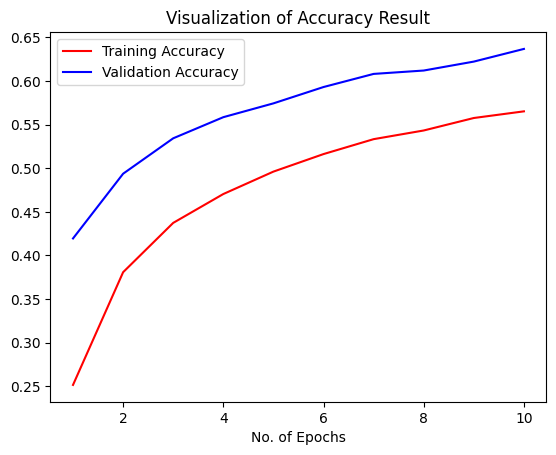

In [17]:
# Plot accuracy history
epochs = range(1, 11)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [18]:
# Prediction and evaluation
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    image_size=(299, 299),
    batch_size=1,
    shuffle=False
)

y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

Found 17572 files belonging to 38 classes.
17572/17572 ━━━━━━━━━━━━━━━━━━━━ 170s 9ms/step


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.52      0.21      0.30       504
                                 Apple___Black_rot       0.62      0.58      0.60       497
                          Apple___Cedar_apple_rust       0.58      0.56      0.57       440
                                   Apple___healthy       0.54      0.37      0.44       502
                               Blueberry___healthy       0.51      0.65      0.57       454
          Cherry_(including_sour)___Powdery_mildew       0.69      0.75      0.72       421
                 Cherry_(including_sour)___healthy       0.70      0.77      0.73       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.58      0.62      0.60       410
                       Corn_(maize)___Common_rust_       0.98      0.94      0.96       477
               Corn_(maize)___Northern_Leaf_Blight       0.65      0.87      0.

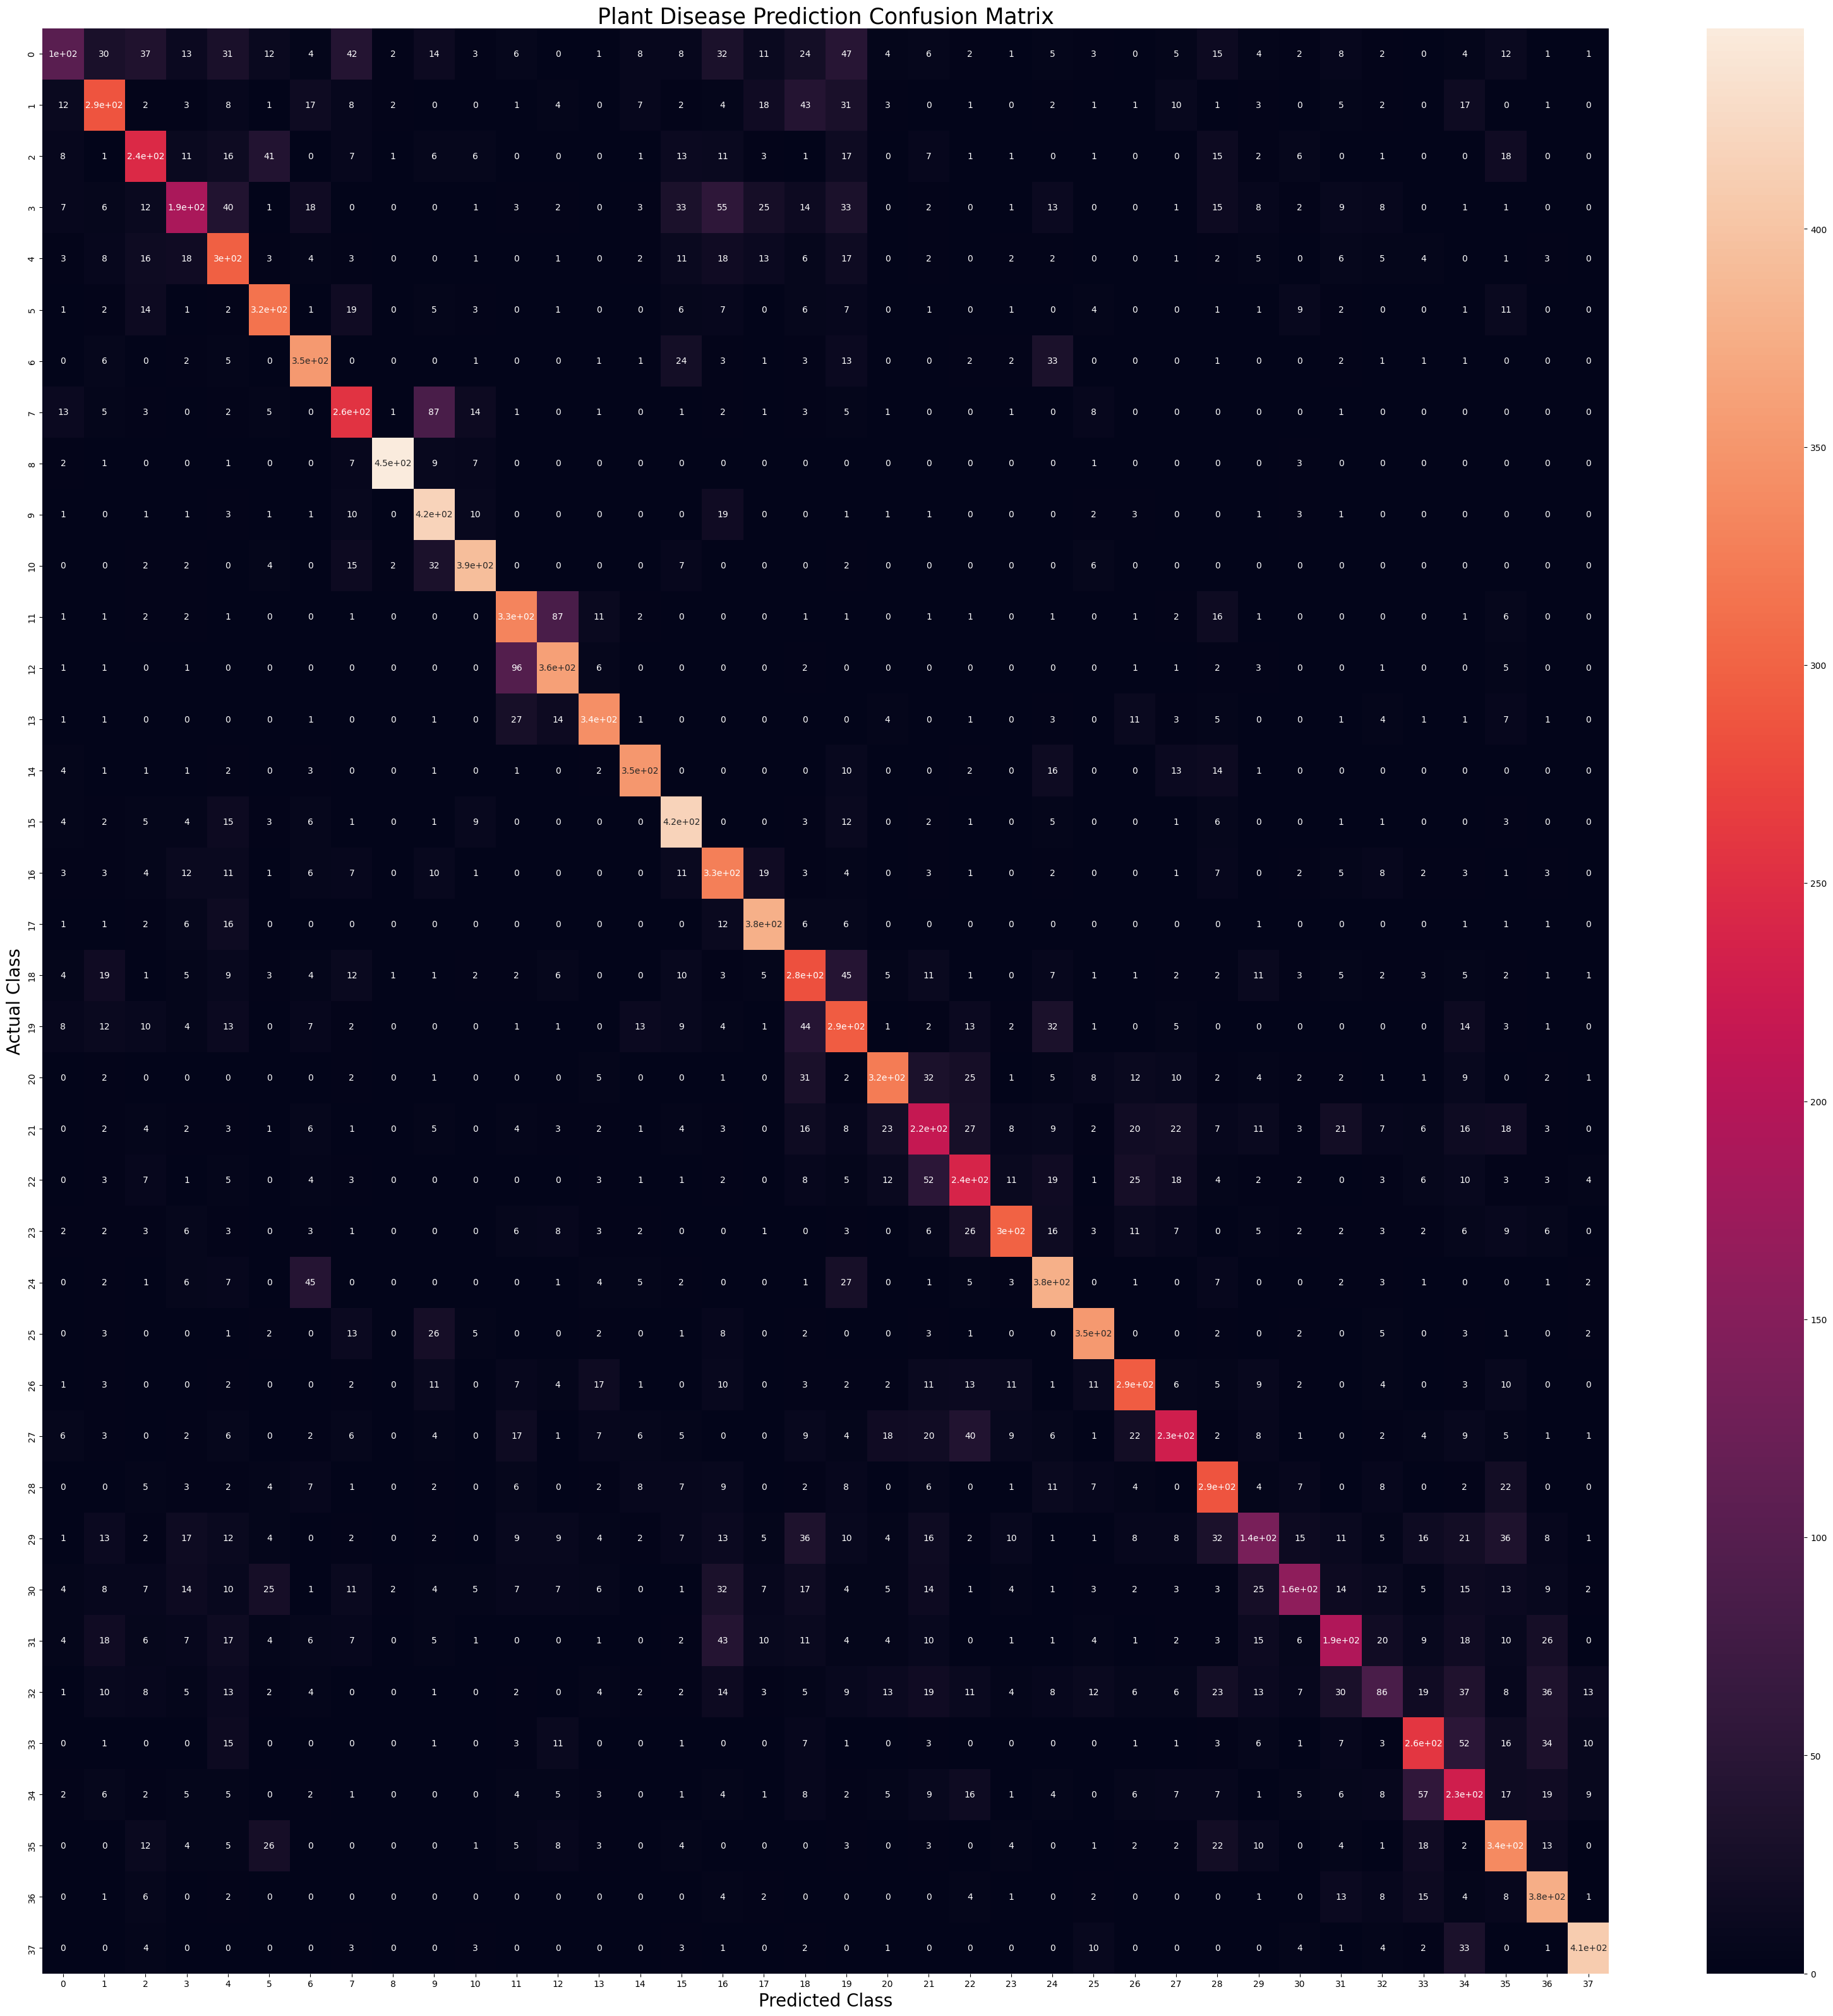

In [19]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_name))

plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()